In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
from IPython import display

from dedalus import public as de
from dedalus.extras import flow_tools

import logging
logger = logging.getLogger(__name__)

In [2]:
Lx = 10.5
nx = 256

x_basis = de.Fourier('x', nx, interval=(0, Lx), dealias=3/2)
domain = de.Domain([x_basis], grid_dtype=np.float64)

In [3]:
params = np.load('Parameters.npz')
Diff = params['Diff'].flat[0]
Km =  params['K'].flat[0]
g = params['g'].flat[0]

problem = de.IVP(domain, variables=['rho1','rho2','rho12','rho3'])
problem.parameters['D0'] = Diff
problem.parameters['K'] = Km
problem.parameters['g0'] = g

problem.substitutions['rho_b'] = "rho1+rho2 + rho3 + rho12" 
problem.substitutions["Lap(A)"] = "dx(dx(A))"

problem.substitutions["grow_non_lin(A,B)"] = "-A*B"

problem.add_equation("dt(rho1) - g0*rho1 - D0*Lap(rho1) = g0*grow_non_lin(rho1,rho_b) - K*rho1*rho2")
problem.add_equation("dt(rho2) - g0*rho2 - D0*Lap(rho2) = g0*grow_non_lin(rho2,rho_b) - K*rho1*rho2")
problem.add_equation("dt(rho3) - g0*rho3 - D0*Lap(rho3) = g0*grow_non_lin(rho3,rho_b) ")
problem.add_equation("dt(rho12)  = 2*K*rho1*rho2")

In [4]:
ts = de.timesteppers.RK443

In [5]:
solver =  problem.build_solver(ts)

2021-10-18 12:58:11,154 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 4.1e+01/s


In [6]:
x = domain.grid(0)
#y = domain.grid(1)
rho1 = solver.state['rho1']
rho2 = solver.state['rho2']
rho3 = solver.state['rho3']
rho12 = solver.state['rho12']


def r(x,y,x0,y0):
    return np.sqrt((x-x0)**2+(y-y0)**2)

def blob(x,y,x0,y0,r0,w):
    return 0.5*(1 - np.tanh((r(x,y,x0,y0)-r0)/w))

def r(x,x0):
    return np.sqrt((x-x0)**2)

def blob(x,x0,r0,w):
    return 0.5*(1 - np.tanh((r(x,x0)-r0)/w))

r0 = 0.75
w = 0.15

rho1['g'] = blob(x,2,r0,w)
rho2['g'] = 0.5*blob(x,7,r0,w)
rho3['g'] = 0.5*blob(x,7,r0,w)

In [7]:
solver.stop_sim_time = 80
dt = 0.3*Lx/nx

In [8]:
analysis = solver.evaluator.add_file_handler('interact_3', sim_dt=1, max_writes=500)
analysis.add_task('rho1')
analysis.add_task('rho2')
analysis.add_task('rho12')
analysis.add_task('rho3')

2021-10-18 12:58:11,448 __main__ 0/1 INFO :: Starting loop


/Users/dominic/miniconda3/envs/dedalus/lib/python3.8/site-packages/dedalus/core/evaluator.py:533: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  dset.dims.create_scale(scale, sn)
/Users/dominic/miniconda3/envs/dedalus/lib/python3.8/site-packages/dedalus/core/evaluator.py:550: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  dset.dims.create_scale(scale, lookup)


2021-10-18 12:58:12,144 __main__ 0/1 INFO :: Iteration: 50, Time: 6.152344e-01, dt: 1.230469e-02
2021-10-18 12:58:12,490 __main__ 0/1 INFO :: Iteration: 100, Time: 1.230469e+00, dt: 1.230469e-02
2021-10-18 12:58:12,856 __main__ 0/1 INFO :: Iteration: 150, Time: 1.845703e+00, dt: 1.230469e-02
2021-10-18 12:58:13,195 __main__ 0/1 INFO :: Iteration: 200, Time: 2.460937e+00, dt: 1.230469e-02
2021-10-18 12:58:13,530 __main__ 0/1 INFO :: Iteration: 250, Time: 3.076172e+00, dt: 1.230469e-02
2021-10-18 12:58:13,850 __main__ 0/1 INFO :: Iteration: 300, Time: 3.691406e+00, dt: 1.230469e-02
2021-10-18 12:58:14,186 __main__ 0/1 INFO :: Iteration: 350, Time: 4.306641e+00, dt: 1.230469e-02
2021-10-18 12:58:14,516 __main__ 0/1 INFO :: Iteration: 400, Time: 4.921875e+00, dt: 1.230469e-02
2021-10-18 12:58:14,851 __main__ 0/1 INFO :: Iteration: 450, Time: 5.537109e+00, dt: 1.230469e-02
2021-10-18 12:58:15,190 __main__ 0/1 INFO :: Iteration: 500, Time: 6.152344e+00, dt: 1.230469e-02
2021-10-18 12:58:15,5

2021-10-18 12:58:40,051 __main__ 0/1 INFO :: Iteration: 4200, Time: 5.167969e+01, dt: 1.230469e-02
2021-10-18 12:58:40,388 __main__ 0/1 INFO :: Iteration: 4250, Time: 5.229492e+01, dt: 1.230469e-02
2021-10-18 12:58:40,710 __main__ 0/1 INFO :: Iteration: 4300, Time: 5.291016e+01, dt: 1.230469e-02
2021-10-18 12:58:41,041 __main__ 0/1 INFO :: Iteration: 4350, Time: 5.352539e+01, dt: 1.230469e-02
2021-10-18 12:58:41,370 __main__ 0/1 INFO :: Iteration: 4400, Time: 5.414062e+01, dt: 1.230469e-02
2021-10-18 12:58:41,696 __main__ 0/1 INFO :: Iteration: 4450, Time: 5.475586e+01, dt: 1.230469e-02
2021-10-18 12:58:42,028 __main__ 0/1 INFO :: Iteration: 4500, Time: 5.537109e+01, dt: 1.230469e-02
2021-10-18 12:58:42,349 __main__ 0/1 INFO :: Iteration: 4550, Time: 5.598633e+01, dt: 1.230469e-02
2021-10-18 12:58:42,683 __main__ 0/1 INFO :: Iteration: 4600, Time: 5.660156e+01, dt: 1.230469e-02
2021-10-18 12:58:43,026 __main__ 0/1 INFO :: Iteration: 4650, Time: 5.721680e+01, dt: 1.230469e-02
2021-10-18

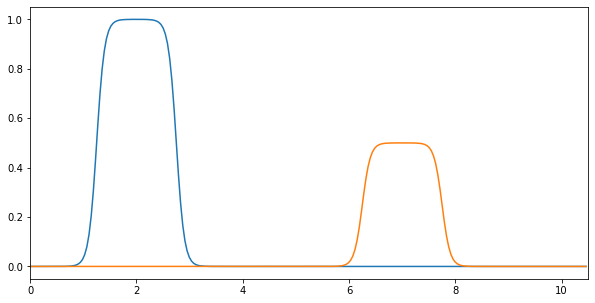

In [10]:
logger.info('Starting loop')
start_time = time.time()
while solver.ok:
    solver.step(dt)
    if solver.iteration % 50 == 0:
        logger.info('Iteration: %i, Time: %e, dt: %e' %(solver.iteration, solver.sim_time, dt))


In [12]:
from dedalus.tools import post
post.merge_process_files("interact_3", cleanup=True)

2021-10-18 12:58:55,582 post 0/1 INFO :: Merging files from interact_3


/Users/dominic/miniconda3/envs/dedalus/lib/python3.8/site-packages/dedalus/tools/post.py:230: H5pyDeprecationWarning: other_ds.dims.create_scale(ds, name) is deprecated. Use ds.make_scale(name) instead.
  joint_dset.dims.create_scale(scale, scalename)
